In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [27]:
[x for x in ri.r.listbof() if x.startswith('iq')]

['iq2xpfb14mcr7_2015_Nov_25_0907.bof',
 'iq2xpfb14mcr4_2013_Aug_02_1446.bof',
 'iqx2fft14dac14r1_2013_Jun_24_1921.bof',
 'iq2xpfb14mcr3_2013_Jul_31_1748.bof',
 'iq2xpfb14mcr7_2015_Nov_25_1102.bof',
 'iq2xpfb14mcr5_2013_Aug_05_1149.bof',
 'iq2xpfb14mcr2_2013_Jul_31_1304.bof',
 'iq2xpfb14mcr6_2015_May_11_2241.bof',
 'iq2xfft14r1_2013_Jul_25_1942.bof']

In [7]:
ri.boffile = 'iq2xpfb14mcr7_2015_Nov_25_0907.bof'

In [8]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr7_2015_Nov_25_0907.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 2973 < /dev/null &> /dev/null &"


In [9]:
ri.set_fft_gain(2)

In [10]:
ri.set_lo(1200)

In [11]:
ri.set_dac_atten(63)

In [12]:
x,y = ri.get_raw_adc()

In [13]:
x.std()

17.945362182335842

In [14]:
x.ptp()

122.0

(0.0001, 0.1)

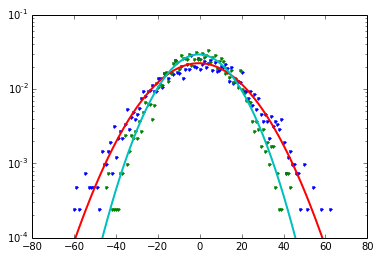

In [15]:
h,b = np.histogram(x,bins=np.arange(-80,80),normed=True)
h2,b = np.histogram(y,bins=np.arange(-80,80),normed=True)
semilogy(b[:-1],h,'.')
semilogy(b[:-1],h2,'.')

t = np.arange(-80,80)
plot(t,np.exp(-((t-x.mean())/(np.sqrt(2)*x.std()))**2)/np.sqrt(2*np.pi*x.std()**2),lw=2)
plot(t,np.exp(-((t-y.mean())/(np.sqrt(2)*y.std()))**2)/np.sqrt(2*np.pi*y.std()**2),lw=2)
ylim(1e-4,1e-1)

(-60.0, 80.0, -50.0, 50.0)

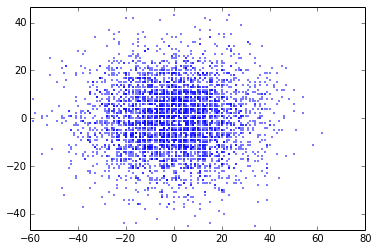

In [16]:
plot(x,y,'.',markersize=2)
axis('equal')

In [17]:
(x+1j*y).std()

22.572447228549049

In [18]:
(x+1j*y).mean()

(-0.45458984375-0.466552734375j)

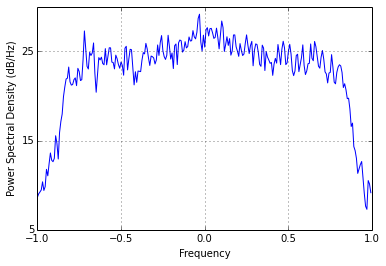

In [19]:
blah = psd(x+1j*y)

In [20]:
ri.set_tone_freqs(np.array([64])+ri.lo_frequency+256./2**17,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1264.00195312])

In [21]:
ri.select_fft_bins([0])

In [22]:
d,addr = ri.get_data(8)

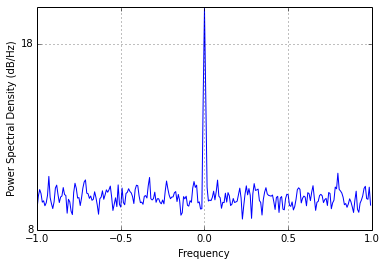

In [23]:
blah = psd(d[:,0])

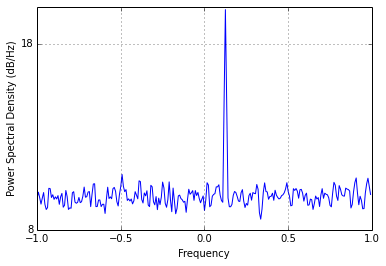

In [24]:
ri.set_dac_atten(63)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])

In [25]:
import time

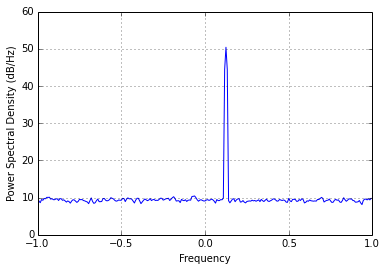

In [26]:
ri.set_dac_atten(20)
time.sleep(1)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])